## This notebook is an example of taking in live data from quandl and calculating the sharpe ratio and plotting returns on a portfolio of tech stock 

In [1]:
import pandas as pd
import quandl 

In [2]:
start = pd.to_datetime('2012-01-01')
end = pd.to_datetime('2018-06-01')

In [3]:
aapl = quandl.get('WIKI/AAPL.11',start_date=start,end_date=end)
csco = quandl.get('WIKI/CSCO.11',start_date=start,end_date=end)
ibm = quandl.get('WIKI/IBM.11',start_date=start,end_date=end)
amzn = quandl.get('WIKI/AMZN.11',start_date=start,end_date=end)

# Pulled stock close prices from quandl
## create normalized returns column

In [4]:
aapl.iloc[0]['Adj. Close']

52.848786580038

In [5]:
for stock_df in (aapl,csco,ibm,amzn):
    stock_df['Normed Return'] = stock_df['Adj. Close'] / stock_df.iloc[0]['Adj. Close']

In [6]:
aapl.head()

,Adj. Close,Normed Return
Date,,
2012-01-03,52.848787,1.000000
2012-01-04,53.132802,1.005374
2012-01-05,53.722681,1.016536
2012-01-06,54.284287,1.027162
2012-01-09,54.198183,1.025533


# Allocations
- 30% aapl
- 20% csco
- 40% amzn
- 10% ibm

In [7]:
for stock_df,allo in zip((aapl,csco,ibm,amzn),[.3,.2,.4,.1]):
    stock_df['Allocation']  = stock_df['Normed Return']* allo

In [8]:
aapl.head()

,Adj. Close,Normed Return,Allocation
Date,,,
2012-01-03,52.848787,1.000000,0.300000
2012-01-04,53.132802,1.005374,0.301612
2012-01-05,53.722681,1.016536,0.304961
2012-01-06,54.284287,1.027162,0.308149
2012-01-09,54.198183,1.025533,0.307660


In [9]:
for stock_df in (aapl,csco,ibm,amzn):
    stock_df['Position Values'] = stock_df['Allocation']*1000000

In [10]:
aapl.head()

,Adj. Close,Normed Return,Allocation,Position Values
Date,,,,
2012-01-03,52.848787,1.000000,0.300000,300000.000000
2012-01-04,53.132802,1.005374,0.301612,301612.236461
2012-01-05,53.722681,1.016536,0.304961,304960.727573
2012-01-06,54.284287,1.027162,0.308149,308148.724558
2012-01-09,54.198183,1.025533,0.307660,307659.946988


# data frame for all stock postition values this represents my portfolio

In [11]:
all_pos_values = [aapl['Position Values'], csco['Position Values'], ibm['Position Values'], amzn['Position Values']]

portfolio_val = pd.concat(all_pos_values, axis=1)

In [12]:
portfolio_val.head()

,Position Values,Position Values,Position Values,Position Values
Date,,,,
2012-01-03,300000.000000,200000.000000,400000.000000,100000.000000
2012-01-04,301612.236461,203864.734300,398368.223296,99150.980283
2012-01-05,304960.727573,203113.258186,396478.797638,99206.836843
2012-01-06,308148.724558,202361.782072,391926.999463,101999.664861
2012-01-09,307659.946988,203650.026838,389887.278583,99737.474166


In [13]:
portfolio_val.columns = ['AAPl Pos', 'CSCO Pos', 'IBM Pos', 'AMZN Pos']

In [14]:
portfolio_val['Total Pos'] = portfolio_val.sum(axis=1)

In [15]:
portfolio_val.head()

,AAPl Pos,CSCO Pos,IBM Pos,AMZN Pos,Total Pos
Date,,,,,
2012-01-03,300000.000000,200000.000000,400000.000000,100000.000000,1.000000e+06
2012-01-04,301612.236461,203864.734300,398368.223296,99150.980283,1.002996e+06
2012-01-05,304960.727573,203113.258186,396478.797638,99206.836843,1.003760e+06
2012-01-06,308148.724558,202361.782072,391926.999463,101999.664861,1.004437e+06
2012-01-09,307659.946988,203650.026838,389887.278583,99737.474166,1.000935e+06


In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5,1,'Total Portfolio Value')

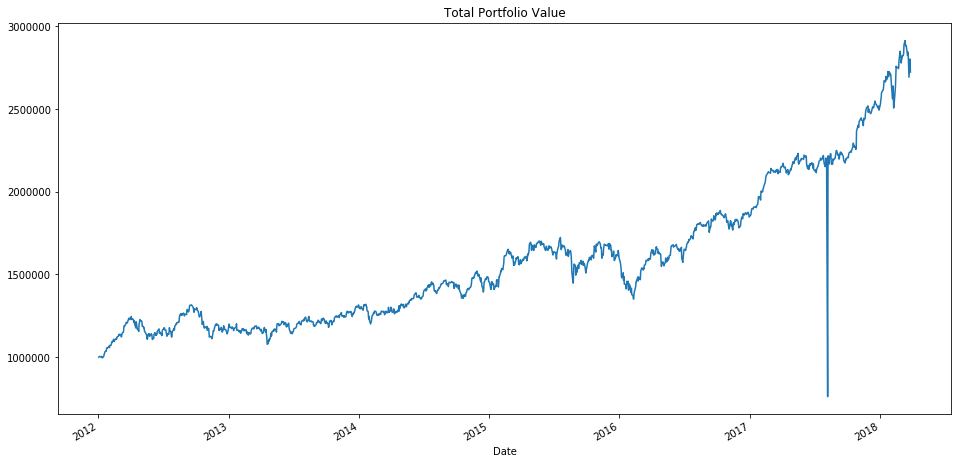

In [17]:
portfolio_val['Total Pos'].plot(figsize=(16,8))
plt.title('Total Portfolio Value')

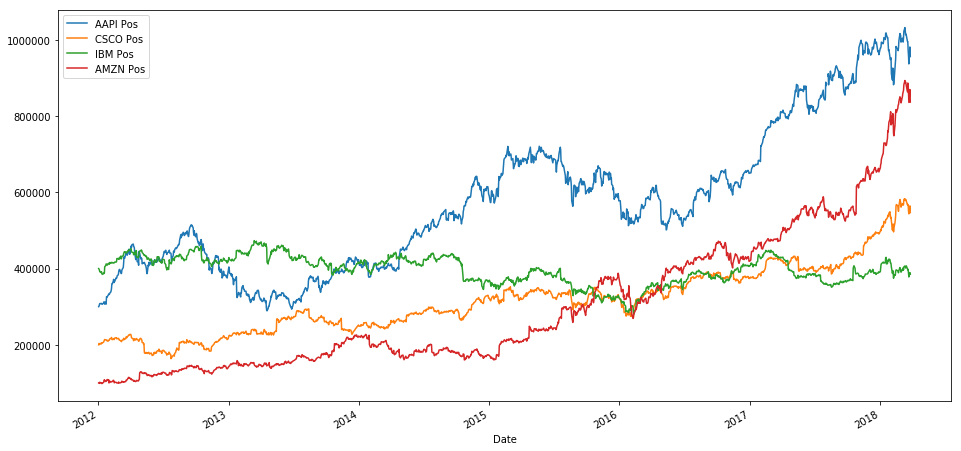

In [18]:
portfolio_val.drop('Total Pos',axis=1).plot(figsize=(16,8));

In [19]:
portfolio_val['Daily Return'] = portfolio_val['Total Pos'].pct_change(1)

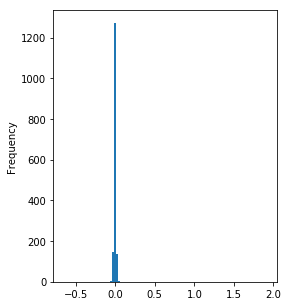

In [31]:
portfolio_val['Daily Return'].plot(kind='hist',bins=100,figsize=(4,5))

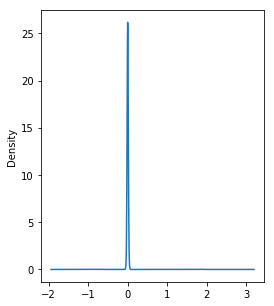

In [32]:
portfolio_val['Daily Return'].plot(kind='kde',figsize=(4,5))

In [34]:
cumulative_return = 100 * (portfolio_val['Total Pos'][-1] / portfolio_val['Total Pos'][0] - 1)

In [35]:
cumulative_return

172.39781738780346

# 172% return for holding period 

# Sharpe Ratio 
### risk adj returns
- mean portfolio return - risk free rate / std dev

In [39]:
SR = portfolio_val['Daily Return'].mean() / portfolio_val['Daily Return'].std()

In [41]:
SR

0.028634670930524762

In [42]:
ASR = (252 ** 0.5)* SR

In [43]:
#Annualized sharpe ratio
ASR

0.4545613089380341